#  Al√©m da Linearidade (Moving Beyond Linearity)

A regress√£o linear padr√£o tem limita√ß√µes significativas em termos de capacidade preditiva devido √† sua suposi√ß√£o quase sempre aproximada e, √†s vezes, imprecisa de linearidade. Embora t√©cnicas como ridge regression e o lasso tenham melhorado essa situa√ß√£o, elas ainda dependem, em certa medida, da suposi√ß√£o de linearidade.

Para superar essas limita√ß√µes, exploraremos extens√µes mais flex√≠veis de modelos lineares e t√©cnicas avan√ßadas:

- **Regress√£o Polinomial:** Este m√©todo estende o modelo linear introduzindo preditores adicionais que s√£o obtidos ao elevar cada preditor original a uma pot√™ncia. Por exemplo, em uma regress√£o c√∫bica, usamos tr√™s vari√°veis: X, X¬≤ e X¬≥, como preditores.

- **Splines de Regress√£o:** Splines s√£o mais flex√≠veis do que polin√¥mios e fun√ß√µes de etapa. Eles dividem o intervalo de X em regi√µes distintas, ajustando uma fun√ß√£o polinomial aos dados em cada regi√£o. No entanto, essas fun√ß√µes polinomiais t√™m a restri√ß√£o de se conectar suavemente nas fronteiras das regi√µes ou "knots".

- **Splines de Suaviza√ß√£o:** Essas splines s√£o semelhantes √†s splines de regress√£o, mas surgem em uma situa√ß√£o diferente. Elas s√£o constru√≠das minimizando um crit√©rio que envolve a soma residual dos quadrados sujeita a uma penaliza√ß√£o de suavidade.

- **Regress√£o Local:** Este m√©todo √© semelhante √†s splines, mas com uma diferen√ßa crucial. Aqui, as regi√µes podem se sobrepor, e essa sobreposi√ß√£o ocorre de maneira muito suave.

- **Modelos Aditivos Generalizados:** Esses modelos nos permitem estender essas t√©cnicas para lidar com v√°rios preditores, proporcionando maior flexibilidade na modelagem das rela√ß√µes entre a resposta e os preditores.

Essas abordagens nos ajudar√£o a superar a limita√ß√£o da linearidade e a criar modelos mais precisos e flex√≠veis para an√°lise de dados.

<b>Importando pacotes, bibliotecas e dados necess√°rios:</b>

In [ ]:
pip install ISLP

In [ ]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize,
poly,
ModelSpec as MS)
from statsmodels.stats.anova import anova_lm
from pygam import (s as s_gam,
l as l_gam,
f as f_gam,
LinearGAM,
LogisticGAM)
from ISLP.transforms import (BSpline,
NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
degrees_of_freedom,
plot as plot_gam,
anova as anova_gam)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.polynomial import Polynomial

import matplotlib.pyplot as plt
from math import sqrt


data = load_data('Wage')
data.head()

year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154

<b>**Criando conjuntos de treinamento e valida√ß√£o e plotando os dados para inspecionar a rela√ß√£o entre sal√°rio e idade:**</b>

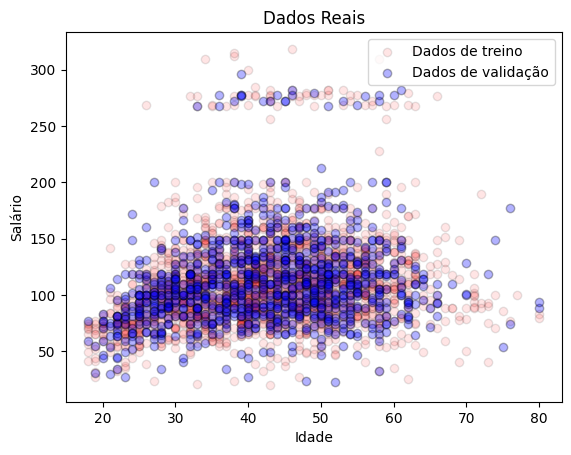

In [ ]:
data_x = data['age']
data_y = data['wage']

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size = 0.33, random_state = 1)

plt.scatter(train_x, train_y,  label='Dados de treino', facecolor='red', edgecolor='k', alpha=0.1)
plt.scatter(valid_x, valid_y,  label='Dados de valida√ß√£o', facecolor='Blue', edgecolor='k', alpha=0.3)
plt.xlabel('Idade')
plt.ylabel('Sal√°rio')
plt.title(f'Dados Reais')
plt.legend()
plt.show()

Linear Reg Model Coef: [0.72190831]
Linear Reg Model Intercept: 80.6528774116384
RMSE Linear Regression: 40.43668748857125


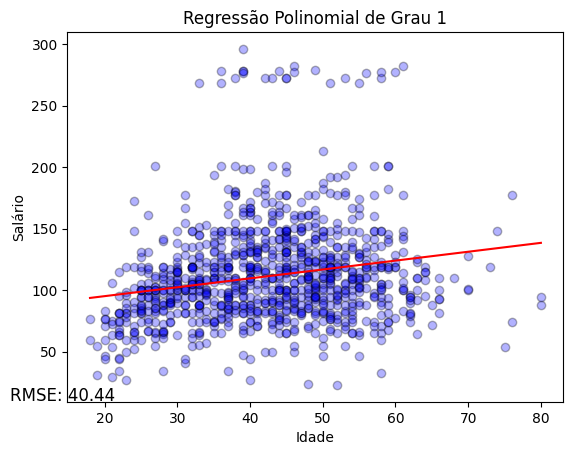

In [ ]:
x = train_x.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, train_y)

print("Linear Reg Model Coef:", model.coef_)
print("Linear Reg Model Intercept:", model.intercept_)

x2 = valid_x.values.reshape(-1, 1)
pred = model.predict(x2)

rmse = sqrt(mean_squared_error(valid_y, pred))
print("RMSE Linear Regression:", rmse)

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
xp = xp.reshape(-1, 1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='Blue', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot, color='r')
plt.xlabel('Idade')
plt.ylabel('Sal√°rio')
plt.title(f'Regress√£o Polinomial de Grau 1')
plt.text(7, 10, f'RMSE: {rmse:.2f}', fontsize=12)
plt.show()

**Regress√£o Polinomial**

A maneira padr√£o de estender a regress√£o linear para configura√ß√µes em que a rela√ß√£o entre os preditores e a resposta √© n√£o linear tem sido substituir o modelo linear padr√£o:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

por uma fun√ß√£o polinomial:

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + \ldots + \beta_d x_i^d + \epsilon_i
$$

Nesta abordagem, conhecida como regress√£o polinomial, utilizamos polin√¥mios de grau superior para criar uma curva extremamente n√£o linear quando o grau d √© suficientemente alto. √â importante notar que os coeficientes de uma fun√ß√£o polinomial podem ser facilmente estimados usando regress√£o linear de m√≠nimos quadrados, pois isso se torna apenas um modelo linear padr√£o com preditores $x_i$, $x_i^2$, $x_i^3$, ..., $x_i^d$. No entanto, geralmente √© incomum usar d maior que 3 ou 4, porque, para valores grandes de d, a curva polinomial pode se tornar excessivamente flex√≠vel e assumir formas muito estranhas. Isso √© especialmente verdadeiro pr√≥ximo √† fronteira da vari√°vel X.

Agora, vamos aplicar essa ideia a um conjunto de dados:




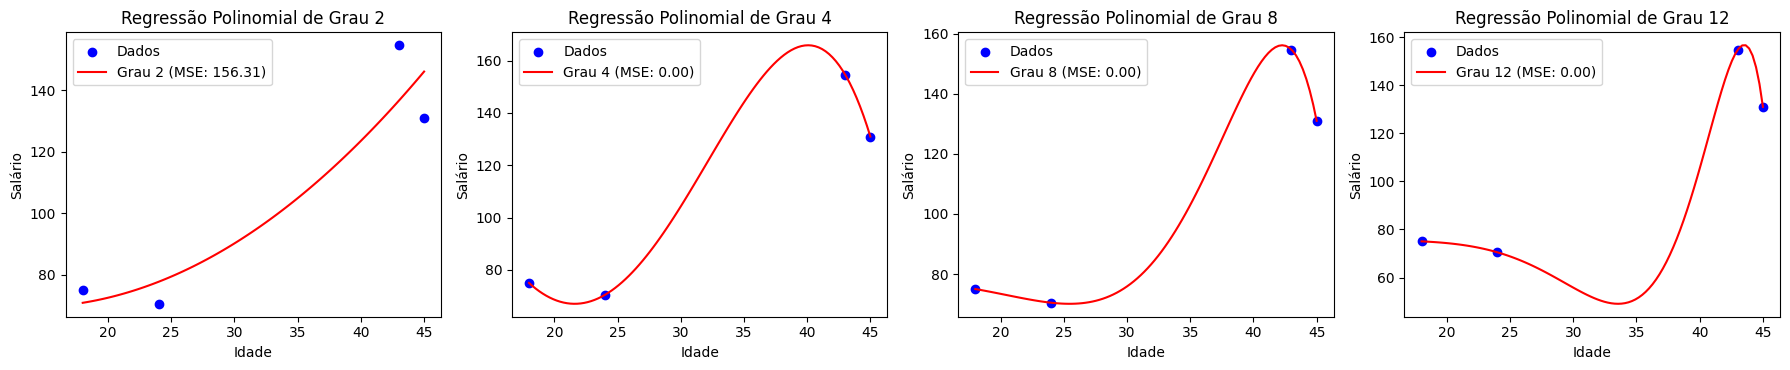

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Seus dados
age = np.array([18, 24, 45, 43])  # Idade
wage = np.array([75.04, 70.48, 130.98, 154.69])  # Sal√°rio

# Graus polinomiais a serem testados
degrees = [2, 4, 8, 12]

# Ajuste do tamanho da figura
plt.figure(figsize=(18, 4))

for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(age, wage, label='Dados', color='blue')

    # Transforma√ß√£o polinomial dos dados
    poly = PolynomialFeatures(degree=degree)
    age_poly = poly.fit_transform(age.reshape(-1, 1))  # Corre√ß√£o aqui

    # Ajuste do modelo linear
    model = LinearRegression()
    model.fit(age_poly, wage)

    # Gerando valores previstos
    predicted_wage = model.predict(age_poly)

    # Calculando erro m√©dio quadr√°tico
    mse = mean_squared_error(wage, predicted_wage)

    # Visualiza√ß√£o da curva de regress√£o polinomial
    x_range = np.linspace(min(age), max(age), 100)
    x_range_poly = poly.transform(x_range.reshape(-1, 1))
    y_range = model.predict(x_range_poly)

    plt.plot(x_range, y_range, label=f'Grau {degree} (MSE: {mse:.2f})', color='red')
    plt.xlabel('Idade')
    plt.ylabel('Sal√°rio')
    plt.title(f'Regress√£o Polinomial de Grau {degree}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Nestes gr√°ficos, podemos notar que, √† medida que aumentamos o grau do polin√¥mio na regress√£o, como exemplificado pelo grau 12, ocorre uma distor√ß√£o significativa nos resultados, mesmo com apenas 4 pontos do conjunto de dados. Essa distor√ß√£o cria uma curva extremamente n√£o linear, onde um segmento da curva fica muito menor do que o restante dos dados.


Agora vamos proceder  √† an√°lise do conjunto de dados presente no livro:

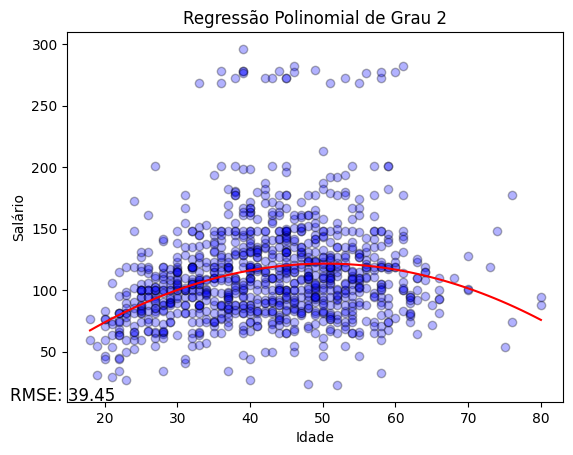

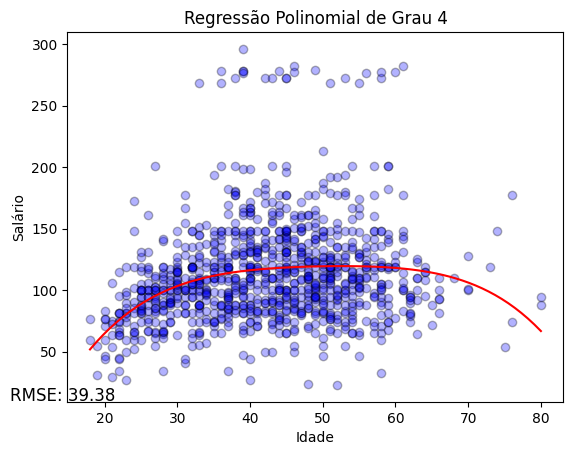

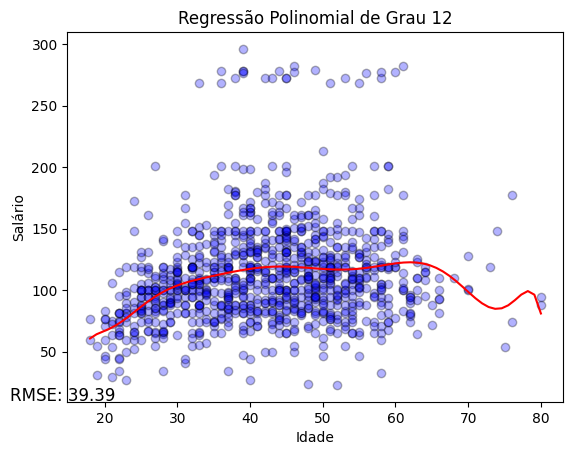

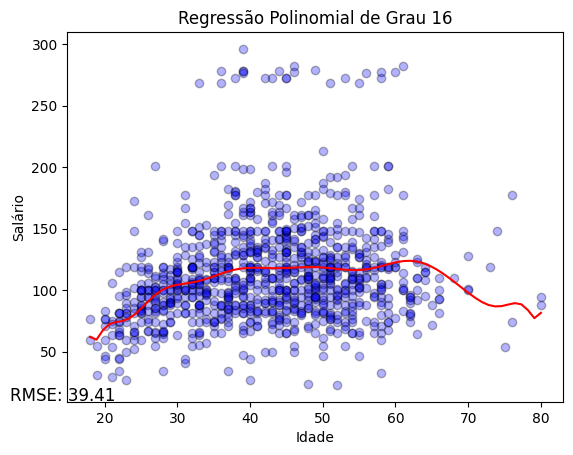

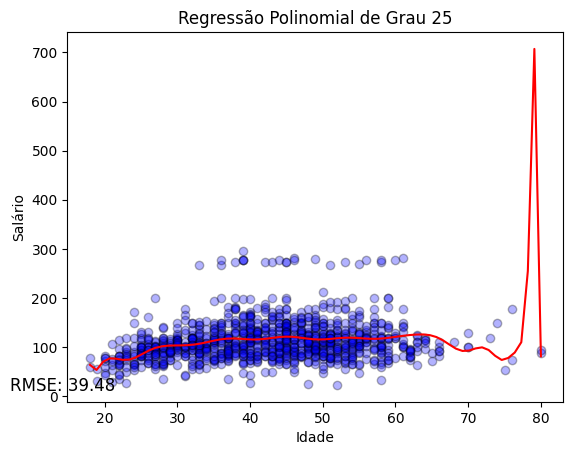

In [ ]:

# Graus dos polin√¥mios a serem testados
graus = [2, 4, 12, 16, 25]

for grau in graus:
    # Ajuste o polin√¥mio com o grau atual
    c = Polynomial.fit(train_x, train_y, deg=grau)
    pred = c(valid_x)

    # Calcule o RMSE
    rmse = sqrt(mean_squared_error(valid_y, pred))

    # Crie o gr√°fico
    xp = np.linspace(valid_x.min(), valid_x.max(), 70)
    pred_plot = c(xp)

    plt.scatter(valid_x, valid_y, facecolor='Blue', edgecolor='k', alpha=0.3)
    plt.plot(xp, pred_plot, color='r')
    plt.xlabel('Idade')
    plt.ylabel('Sal√°rio')
    plt.title(f'Regress√£o Polinomial de Grau {grau}')
    plt.text(7, 10, f'RMSE: {rmse:.2f}', fontsize=12)
    plt.show()



**O que √© Regress√£o degrau (Step Functions)?**

Estamos tentando entender como a idade de uma pessoa afeta o seu sal√°rio

**Dividindo em Etapas:**

1. **Primeiro Passo:** Primeiro, criamos o que chamamos de "vari√°veis dummy". Isso √© como se estiv√©ssemos criando bot√µes de ligar/desligar para diferentes faixas et√°rias. Por exemplo, podemos ter tr√™s bot√µes: jovens, adultos e idosos. Esses bot√µes representam se algu√©m pertence a uma dessas faixas et√°rias ou n√£o.

2. **Segundo Passo:** Para cada pessoa, apertamos um desses bot√µes com base na sua idade. Se algu√©m tiver menos de 25 anos, apertamos o bot√£o "jovens", se tiver entre 25 e 35 anos, apertamos o bot√£o "adultos", e se tiver mais de 35 anos, apertamos o bot√£o "idosos".

3. **Terceiro Passo:** Agora, quando queremos saber como a idade afeta o sal√°rio, n√£o precisamos fazer contas complicadas. Basta olhar quais bot√µes est√£o ligados para aquela pessoa. Se o bot√£o "jovens" estiver ligado, usamos uma m√©dia de sal√°rio para jovens; se o bot√£o "adultos" estiver ligado, usamos a m√©dia de sal√°rio para adultos, e assim por diante.

A regress√£o degrau √© √∫til porque nos permite entender como uma vari√°vel, como a idade, afeta outra vari√°vel, como o sal√°rio, de uma maneira f√°cil de interpretar. Em vez de tentar encontrar uma f√≥rmula complicada, apenas dividimos em grupos e calculamos m√©dias.


Estamos dividindo as idades em grupos usando a fun√ß√£o pd.cut. Essa t√©cnica nos ajuda a agrupar as idades em categorias distintas, facilitando a identifica√ß√£o de padr√µes ou tend√™ncias nos dados. Isso torna a an√°lise mais compreens√≠vel e √∫til.

In [ ]:
df_cut, bins = pd.cut(train_x, 4, retbins = True, right = True)
df_cut.value_counts(sort = False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [ ]:
df_steps = pd.concat([train_x, df_cut, train_y], keys = ['age', 'age_cuts', 'wage'], axis = 1)
df_steps.head()

age        age_cuts        wage
1382   49    (33.5, 49.0]  117.146817
23     40    (33.5, 49.0]  160.642475
2140   55    (49.0, 64.5]   81.283253
1117   32  (17.938, 33.5]   94.072715
933    42    (33.5, 49.0]   75.043154

In [ ]:
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80']
df_steps_dummies.head()

17.938-33.5  33.5-49  49-64.5  64.5-80
1382            0        1        0        0
23              0        1        0        0
2140            0        0        1        0
1117            1        0        0        0
933             0        1        0        0

In [ ]:
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()
bin_mapping = np.digitize(valid_x, bins)

x_valid = pd.get_dummies(bin_mapping)
x_valid.head()

1  2  3  4  5
0  0  0  1  0  0
1  0  1  0  0  0
2  0  0  1  0  0
3  0  1  0  0  0
4  1  0  0  0  0

In [ ]:
# coluna atipica
x_valid = pd.get_dummies(bin_mapping).drop([5], axis = 1)
pred2 = fit3.predict(x_valid)


print("RMSE for GLM:", sqrt(mean_squared_error(valid_y, pred2)))


RMSE for GLM: 39.99060078376046


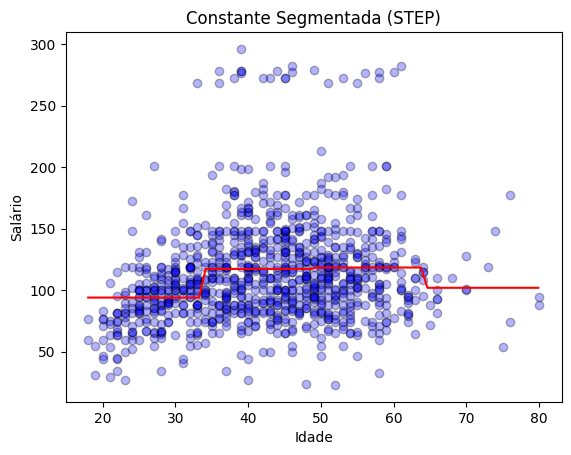

In [ ]:
# Cria um espa√ßo linear para a idade
age_grid = np.linspace(valid_x.min(), valid_x.max()-0.1, 70)

# Segmenta√ß√£o baseada nas faixas
bin_mapping = np.digitize(age_grid, bins)

# Transforme em vari√°veis dummy
X_valid_2 = pd.get_dummies(bin_mapping)

# Previs√µes
pred2 = fit3.predict(X_valid_2)

# Plotagem dos resultados
plt.scatter(valid_x, valid_y, facecolor='Blue', edgecolor='k', alpha=0.3)
plt.plot(age_grid, pred2, c='r')

plt.xlabel('Idade')
plt.ylabel('Sal√°rio')
plt.title('Constante Segmentada (STEP)')
plt.show()


**Bases de Fun√ß√µes: Uma Abordagem Flex√≠vel para Modelagem**

Os modelos de regress√£o polinomial e degrau que discutimos anteriormente s√£o, na verdade, casos especiais de uma abordagem mais ampla chamada de bases de fun√ß√µes. O cerne dessa abordagem √© substituir diretamente a vari√°vel original $X$ por uma combina√ß√£o de fun√ß√µes predefinidas, as quais chamamos de fun√ß√µes de base.

Em vez de modelar a rela√ß√£o entre $X$ e $Y$ de forma linear, ajustamos o modelo da seguinte maneira:

$$
y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + \beta_3b_3(x_i) + \ldots + \beta_Kb_K(x_i) + \epsilon_i.
$$

Aqui, $b_1(x_i)$, $b_2(x_i)$, $\ldots$, $b_K(x_i)$ representam as fun√ß√µes de base, que s√£o escolhidas antecipadamente e n√£o mudam durante o processo de ajuste do modelo. A vantagem dessa abordagem √© que podemos capturar rela√ß√µes mais complexas entre $X$ e $Y$ usando essas fun√ß√µes de base.

Na regress√£o polinomial, as fun√ß√µes de base s√£o simplesmente pot√™ncias de $X$, como $b_j(x_i) = x_i^j$. J√° na regress√£o degrau, usamos fun√ß√µes constantes em partes, representadas por $b_j(x_i) = I(c_j \leq x_i < c_{j+1})$, onde $c_j$ s√£o os pontos de corte.

A estimativa dos coeficientes de regress√£o $\beta_0$, $\beta_1$, $\beta_2$, $\ldots$, $\beta_K$ √© feita usando o m√©todo dos m√≠nimos quadrados, semelhante √† regress√£o linear simples.

Al√©m das fun√ß√µes polinomiais e constantes em partes, existem muitas outras alternativas para escolher como fun√ß√µes de base, como wavelets e s√©ries de Fourier. Na pr√≥xima se√ß√£o, exploraremos uma escolha muito comum: as splines de regress√£o, que oferecem grande flexibilidade na modelagem de rela√ß√µes complexas entre vari√°veis.


# Regression Splines

## Polin√¥mios em Partes (Piecewise Polynomials)

Ao inv√©s de ajustar um √∫nico polin√¥mio de alto grau que abranja toda a faixa de valores de X, a regress√£o polinomial em partes adota uma abordagem diferente. Ela consiste em ajustar polin√¥mios de baixo grau separadamente em diferentes regi√µes de X.

Por exemplo, podemos considerar o seguinte modelo:

$y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + \beta_3x_i^3 + e_i$

Quando adicionamos um n√≥ em um ponto $c$, o modelo resultante tem duas partes distintas:

1. Para $x_i < c$, os coeficientes s√£o $\beta_{01}$, $\beta_{11}$, $\beta_{21}$ e $\beta_{31}$.
2. Para $x_i \geq c$, os coeficientes s√£o $\beta_{02}$, $\beta_{12}$, $\beta_{22}$ e $\beta_{32}$.

Essencialmente, estamos dividindo nossos dados em duas partes com base no valor de c e ajustando dois polin√¥mios diferentes √†s duas regi√µes distintas.

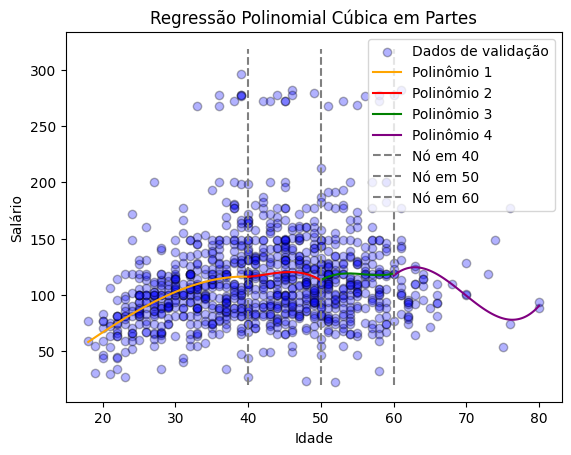

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pontos de corte (n√≥s) - exemplo com tr√™s n√≥s
c_values = [40, 50, 60]  # Lista de n√≥s

# Graus dos polin√¥mios - exemplo com grau 3 para todos os polin√¥mios
degrees = [3, 3, 3]  # Graus correspondentes aos n√≥s

# Inicializando listas para armazenar os grids de idade, coeficientes e previs√µes
age_grids = []
coeffs = []
predictions = []

# Loop para criar grids, ajustar polin√¥mios e fazer previs√µes para cada n√≥, incluindo o √∫ltimo intervalo
for i, c in enumerate(c_values):
    # Criando o grid de idade para o n√≥ atual
    if i == 0:
        age_min = train_x.min()
        age_max = c
    else:
        age_min = c_values[i - 1]
        age_max = c

    age_grid = np.linspace(age_min, age_max, 100)
    age_grids.append(age_grid)

    # Dividindo os dados de treino em duas partes com base no n√≥ atual
    train_x_part = train_x[(train_x >= age_min) & (train_x <= age_max)]
    train_y_part = train_y[(train_x >= age_min) & (train_x <= age_max)]

    # Ajustando polin√¥mio com o grau correspondente
    coeffs_part = np.polyfit(train_x_part, train_y_part, degrees[i])
    coeffs.append(coeffs_part)

    # Fazendo previs√µes para o conjunto de dados de idade criado
    predictions_part = np.polyval(coeffs_part, age_grid)

    predictions.append(predictions_part)

# Lidando com o √∫ltimo intervalo
age_min = c_values[-1]
age_max = train_x.max()
age_grid = np.linspace(age_min, age_max, 100)
age_grids.append(age_grid)

train_x_part = train_x[(train_x >= age_min)]
train_y_part = train_y[(train_x >= age_min)]
# Ajustando polin√¥mio com o grau correspondente
coeffs_part = np.polyfit(train_x_part, train_y_part, degrees[i])
coeffs.append(coeffs_part)

# Fazendo previs√µes para o conjunto de dados de idade criado
predictions_part = np.polyval(coeffs_part, age_grid)
predictions.append(predictions_part)

# Plotagem dos resultados
plt.scatter(valid_x, valid_y, facecolor='Blue', label='Dados de valida√ß√£o', edgecolor='k', alpha=0.3)

# Plotagem das curvas de ajuste nos conjuntos de dados de idade
colors = ['orange', 'red', 'green']  # Cores para as curvas
for i in range(len(c_values)):
    plt.plot(age_grids[i], predictions[i], linestyle='-', color=colors[i], label=f'Polin√¥mio {i + 1}')
# Plotagem do √∫ltimo intervalo
plt.plot(age_grids[-1], predictions[-1], linestyle='-', color='purple', label=f'Polin√¥mio {len(c_values) + 1}')

# Conectando os n√≥s em c
for c in c_values:
    plt.plot([c, c], [min(train_y), max(train_y)], linestyle='--', color='gray', label=f'N√≥ em {c}')



plt.xlabel('Idade')
plt.ylabel('Sal√°rio')
plt.title('Regress√£o Polinomial C√∫bica em Partes')
plt.legend()
plt.show()


 Podemos ajustar curvas mais flex√≠veis usando polin√¥mios em partes, mas √© importante impor restri√ß√µes para evitar resultados n√£o realistas. Isso pode ser feito exigindo continuidade nas curvas ajustadas e at√© mesmo nas derivadas das curvas em pontos espec√≠ficos, como n√≥s. Quanto mais restri√ß√µes impusermos, menos graus de liberdade teremos no ajuste, resultando em curvas mais suaves e realistas. Existem diferentes tipos de splines, como splines c√∫bicos e lineares, que podem ser usados com v√°rias restri√ß√µes para atender √†s necessidades espec√≠ficas do problema.


## Spline C√∫bico vs. Spline Natural:

Ao estudar como ajustar curvas suaves a dados complicados, nos deparamos com duas t√©cnicas: splines c√∫bicos e splines naturais. Ambos t√™m suas vantagens, e a escolha entre eles √© crucial para obter resultados precisos e compreens√≠veis.

**Splines**:

Splines s√£o uma maneira inteligente de modelar curvas suaves a partir de dados complexos. Ao inv√©s de utilizar um √∫nico polin√¥mio, que pode ser r√≠gido e n√£o se ajustar bem a certos tipos de dados, splines dividem a curva em pequenos trechos, cada um modelado por um polin√¥mio. A m√°gica acontece nos "n√≥s," pontos onde esses trechos se conectam de forma cont√≠nua, criando uma curva geral suave e adapt√°vel.

**M√≠nimos Quadrados - Encontrando a Melhor Combina√ß√£o**

Quando usamos splines, seja c√∫bico ou natural, usamos um m√©todo chamado m√≠nimos quadrados. Esse m√©todo ajuda a encontrar a melhor combina√ß√£o de polin√¥mios em cada trecho para ajustar nossos dados. Em outras palavras, ele procura os coeficientes ideais para cada polin√¥mio de forma que, quando todos se juntam nos "n√≥s", a curva resultante se ajuste da melhor forma poss√≠vel aos nossos dados. Em resumo, estamos minimizando a diferen√ßa entre a curva ajustada e os dados reais, o que nos d√° uma estimativa precisa da rela√ß√£o subjacente.

**Spline C√∫bico vs. Spline Natural**

Agora, a escolha entre spline c√∫bico e spline natural depende de suas caracter√≠sticas:
- O spline c√∫bico usa polin√¥mios de terceiro grau em seus trechos, oferecendo flexibilidade. No entanto, essa flexibilidade pode levar a ajustes irregulares, especialmente nos "n√≥s".
- O spline natural tamb√©m √© c√∫bico, mas adiciona restri√ß√µes. Al√©m de garantir a continuidade da segunda derivada nos "n√≥s," ele tamb√©m exige que a curva seja linear nas bordas dos dados, proporcionando maior estabilidade nessas √°reas cr√≠ticas.

**Grau de Liberdade e Considera√ß√µes Finais**

O grau de flexibilidade de um spline √© controlado pelo n√∫mero de "n√≥s." Cada restri√ß√£o imposta em um spline reduz a complexidade, liberando graus de liberdade. Portanto, um spline c√∫bico com K "n√≥s" utiliza um total de 4 + K graus de liberdade.

Um spline natural tem K graus de liberdade, onde K representa o n√∫mero de "n√≥s" ou pontos de transi√ß√£o onde ocorrem as corre√ß√µes nos polin√¥mios.

O spline c√∫bico tem 4 + K graus de liberdade devido √† natureza da sua constru√ß√£o. Vamos explicar isso em detalhes:

1. **Intercepto (1 grau de liberdade):** Come√ßando com um spline c√∫bico, temos um intercepto, que √© um coeficiente que controla o deslocamento vertical da curva ajustada.

2. **Coeficientes para Termos de Pot√™ncia (3 graus de liberdade):** Um spline c√∫bico utiliza polin√¥mios de terceiro grau em cada segmento entre os "n√≥s." Portanto, para cada segmento, precisamos estimar tr√™s coeficientes que controlam os termos de pot√™ncia (x, x¬≤ e x¬≥) do polin√¥mio c√∫bico.

3. **N√≥s (K graus de liberdade):** Para criar uma curva suave e flex√≠vel, escolhemos os "n√≥s" onde os polin√¥mios se encontram. Cada "n√≥" adiciona um grau de liberdade, pois podemos ajustar sua posi√ß√£o para melhorar o ajuste aos dados.

No total, temos 4 + K graus de liberdade no spline c√∫bico: 1 para o intercepto, 3 para os termos de pot√™ncia e K para os "n√≥s." Isso nos permite controlar a flexibilidade da curva ajustada e adapt√°-la √†s caracter√≠sticas dos dados.

##  Escolhendo o N√∫mero e a Localiza√ß√£o dos N√≥s (Choosing the Number and Locations of the Knots)

Ao ajustar uma spline, a escolha da localiza√ß√£o dos "n√≥s" √© importante. Os  "n√≥s" determinam onde a spline pode mudar rapidamente. Voc√™ pode colocar mais "n√≥s" em √°reas onde a fun√ß√£o deve variar rapidamente e menos  "n√≥s"  onde a fun√ß√£o √© mais est√°vel. No entanto, geralmente, os "n√≥s" s√£o colocados uniformemente, dividindo os dados em partes iguais. Uma maneira objetiva de determinar quantos  "n√≥s"  usar √© usar a valida√ß√£o cruzada. Nesse m√©todo:

- Ajustamos uma spline com um certo n√∫mero de "n√≥s" aos dados.
- Usamos a spline para fazer previs√µes para a parte retida.
- Repetimos esse processo v√°rias vezes at√© que cada observa√ß√£o tenha sido deixada de fora uma vez.
- Calculamos o erro m√©dio quadrado global da valida√ß√£o cruzada.
- Escolhemos o n√∫mero de "n√≥s" que resulta no menor erro m√©dio quadrado.

In [ ]:
def create_basis(data_x, num_nodes, spline_type='natural'):
    if spline_type == 'natural':
        basis = MS([ns('age', df=num_nodes)]).fit(data_x)
    else:
        basis = MS([bs('age', df=num_nodes, degree=3)]).fit(data_x)
    return basis

def transform_data(basis, data_x, age_df):
    X = basis.transform(data_x)
    Xnew = basis.transform(age_df)
    return X, Xnew

def fit_model(data_y, X):
    M = sm.OLS(data_y, X).fit()
    return M

def predict_mean(M, Xnew):
    preds = M.get_prediction(Xnew).predicted_mean
    predicted_df = pd.DataFrame({'Predicted': preds})
    return predicted_df

def fit_spline(data_x, data_y, age_df, num_nodes, spline_type='natural'):
    basis = create_basis(data_x, num_nodes, spline_type)
    X, Xnew = transform_data(basis, data_x, age_df)
    M = fit_model(data_y, X)
    predicted_df = predict_mean(M, Xnew)
    return predicted_df


N√∫mero do n√≥ ideal para Spline Natural: 6, MSE: 3601.8267667482364
N√∫mero do n√≥ ideal para Spline C√∫bica: 10, MSE: 3592.748476741308
N√∫mero do n√≥ indesejavel para Spline Natural: 4, MSE: 3624.439574663562
N√∫mero do n√≥ indesejavel para Spline C√∫bica: 6, MSE: 3630.0514974378007


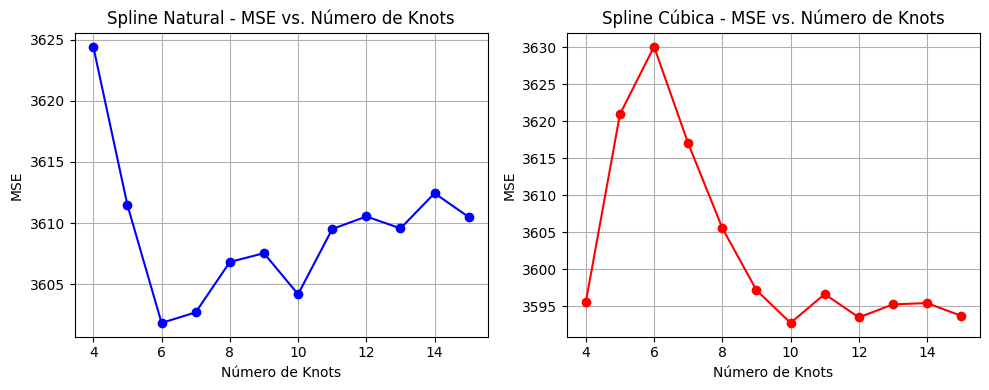

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Converter em DataFrames
data_x = pd.DataFrame(data['age'])
data_y = pd.DataFrame(data['wage'])


# Transforma age em uma matriz unidimensional
age_array = data_x.values.reshape(-1)

# Define o n√∫mero m√°ximo de n√≥s que voc√™ deseja testar
max_nodes = 15

# Cria uma lista para armazenar os erros MSE para Spline Natural
mse_list_ns = []

# Cria uma lista para armazenar os erros MSE para Spline C√∫bica
mse_list_cubic = []

# Transforma age em uma matriz unidimensional
age_array = data_x.values.reshape(-1)

# cria age_df
age_grid = np.linspace(age_array.min(), age_array.max(), 100)
age_df = pd.DataFrame({'age': age_grid})

# Testar diferentes n√∫meros de n√≥s para Natural Spline e Spline C√∫bica
#  a cubic spline with K knots uses K+4 degrees of freedom.

# Vetor de n√∫meros de n√≥s
num_nodes_list = list(range(4, max_nodes + 1))

for num_nodes in num_nodes_list:
    # Criar o modelo de Spline Natural com o n√∫mero atual de n√≥s

    pred_ns = fit_spline(data_x, data_y, age_df, num_nodes, spline_type='natural')
    mse_ns = mean_squared_error(pred_ns, age_df.values)

    pred_cubic = fit_spline(data_x, data_y, age_df, num_nodes, spline_type='cubic')
    mse_cubic = mean_squared_error(pred_cubic, age_df.values)

    # Adicione os erros MSE √† lista correspondente
    mse_list_ns.append((num_nodes, mse_ns))
    mse_list_cubic.append((num_nodes, mse_cubic))

# N√∫mero do n√≥ com o menor erro MSE para Spline Natural
best_node_ns, best_mse_ns = min(mse_list_ns, key=lambda x: x[1])

# N√∫mero do n√≥ com o menor erro MSE para Spline C√∫bica
best_node_cubic, best_mse_cubic = min(mse_list_cubic, key=lambda x: x[1])


# N√∫mero do n√≥ com o maior erro MSE para Spline Natural
worst_node_ns, worst_mse_ns = max(mse_list_ns, key=lambda x: x[1])
# N√∫mero do n√≥ com o maior erro MSE para Spline C√∫bica
worst_node_cubic, worst_mse_cubic = max(mse_list_cubic, key=lambda x: x[1])

print(f'N√∫mero do n√≥ ideal para Spline Natural: {best_node_ns}, MSE: {best_mse_ns}')
print(f'N√∫mero do n√≥ ideal para Spline C√∫bica: {best_node_cubic}, MSE: {best_mse_cubic}')
print(f'N√∫mero do n√≥ indesejavel para Spline Natural: {worst_node_ns}, MSE: {worst_mse_ns}')
print(f'N√∫mero do n√≥ indesejavel para Spline C√∫bica: {worst_node_cubic}, MSE: {worst_mse_cubic}')

#  gr√°fico de n√∫mero de n√≥s x MSE para ambas as Spline Natural e Spline C√∫bica

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(num_nodes_list, [tupla[1] for tupla in  mse_list_ns], marker='o', linestyle='-', color='b')
plt.title('Spline Natural - MSE vs. N√∫mero de Knots')
plt.xlabel('N√∫mero de Knots')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_nodes_list, [tupla[1] for tupla in mse_list_cubic ] , marker='o', linestyle='-', color='r')
plt.title('Spline C√∫bica - MSE vs. N√∫mero de Knots')
plt.xlabel('N√∫mero de Knots')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()


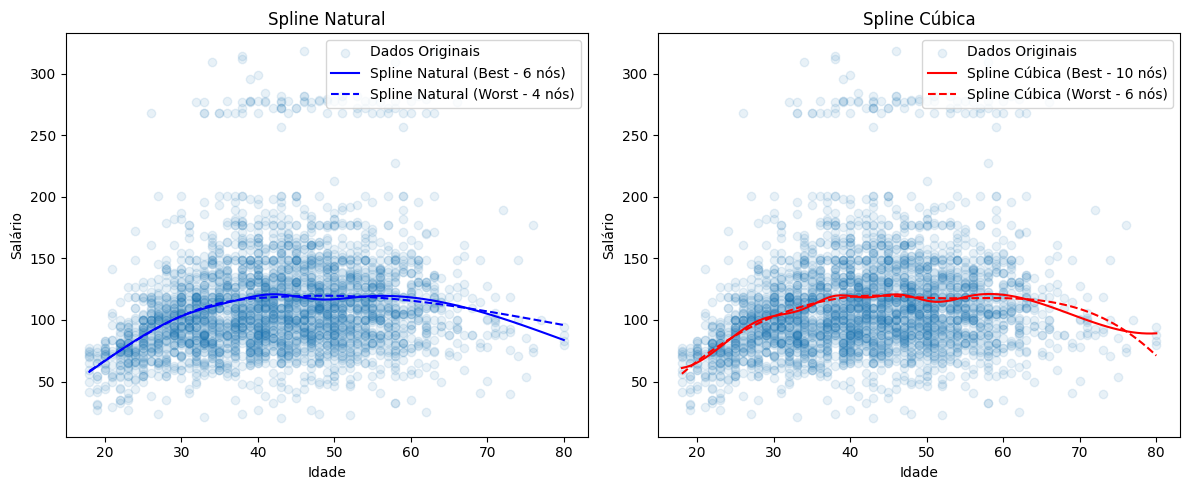

In [ ]:
# Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# (Spline Natural)
ax1.scatter(data_x, data_y, label='Dados Originais', alpha=0.1)
preds_best_ns = fit_spline(data_x, data_y, age_df, best_node_ns)
preds_worst_ns = fit_spline(data_x, data_y, age_df, worst_node_ns)
ax1.plot(age_df['age'], preds_best_ns, label=f'Spline Natural (Best - {best_node_ns} n√≥s)', linestyle='-', color='b')
ax1.plot(age_df['age'], preds_worst_ns, label=f'Spline Natural (Worst - {worst_node_ns} n√≥s)', linestyle='--', color='b')
ax1.set_title('Spline Natural')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Sal√°rio')
ax1.legend()

# (Spline C√∫bica)
ax2.scatter(data_x, data_y, label='Dados Originais', alpha=0.1)
preds_best_cubic = fit_spline(data_x, data_y, age_df, best_node_cubic, spline_type='cubic')
preds_worst_cubic = fit_spline(data_x, data_y, age_df, worst_node_cubic, spline_type='cubic' )
ax2.plot(age_df['age'], preds_best_cubic, label=f'Spline C√∫bica (Best - {best_node_cubic} n√≥s)', linestyle='-', color='r')
ax2.plot(age_df['age'], preds_worst_cubic, label=f'Spline C√∫bica (Worst - {worst_node_cubic} n√≥s)', linestyle='--', color='r')
ax2.set_title('Spline C√∫bica')
ax2.set_xlabel('Idade')
ax2.set_ylabel('Sal√°rio')
ax2.legend()

# Ajuste o layout
plt.tight_layout()
plt.show()

#  Splines de Suaviza√ß√£o (Smoothing Splines)

## Uma Vis√£o Geral das Splines de Suaviza√ß√£o (An overview of Smoothing Splines)

O que queremos encontrar aqui √© uma fun√ß√£o $g(x)$ que ajuste os dados observados da forma mais suave poss√≠vel, ou seja, queremos encontrar um RSS que seja o menor poss√≠vel e diferente de 0.

O smoothing spline nesse caso ser√° dado pela fun√ß√£o g que minimiza:
$$\sum_{i=1}^n (y_i - g(x_i))^2 + \lambda \int g''(t)^2dt$$
Onde, $\lambda > 0$ √© o par√¢metro de ajuste. O primeiro termo da express√£o se refere a fun√ß√£o de perda e o segundo √© o termo que penaliza a varia√ß√£o em g.

O spline de suaviza√ß√£o nada mais √© do que um spline cubico natural com n√≥s em cada valor √∫nico de $x_i$

## Escolhendo o Par√¢metro de Suaviza√ß√£o $\lambda$ (Choosing the Smoothing Parameter $\lambda$)

Ter um n√≥ em cada ponto nos traz a ideia de um modelo com alta flexibilidade e consequentemente um alto grau de liberdade. E √© justamente por isso que o par√¢metro lambda se torna importante, ele que ser√° o respons√°vel por por contralar a suaviza√ß√£o do smoothing spline, afetando os graus de liberdade efetivo.
Se Œª aumenta de 0 a ‚àû os graus de liberdade efetivo  ($df_{Œª}$) decrescem de n para 2. Quanto maior for $df_{Œª}$ mais flexivel √© o modelo (menor vi√©s e maior vari√¢ncia).
Escrevendo a seguinte express√£o:
$$\hat{g}_\lambda = S_\lambda y$$

Podemos definir os graus de liberdade efetivo como sendo a soma dos elementos da diagonal principal da matriz $S_\lambda$:
$$df_Œª = ‚àë^n_{i=1} \{S_Œª\}_{ii}$$


Um problema desse modelo √© definir o valor de lambda e para isso podemos utilizar cross-validation, ou seja encontraremoso valor de lambda que torna o erro RSS da valida√ß√£o cruzada o menor poss√≠vel. Esse erro (LOOCV) pode ser calculado facilmente para splines de suaviza√ß√£o como segue:
 ùõå ser√° dado pelo valor que faz o cross validation RSS ser o menor poss√≠vel.
$$RSS_{cv}(\lambda) = \sum_{i-1}^n (y_i - \hat{g}^{(-i)}_\lambda (x_i))^2 = \sum_{i=1}^n\left[ \frac{y_i - \hat{g}_{\lambda}(x_i)}{1 - \{S_{\lambda}\}_{ii}} \right]^2$$

O valor de lambda que minimiza a express√£o acima ser√° nosso valor √≥timo para o par√¢metro de suaviza√ß√£o.




100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


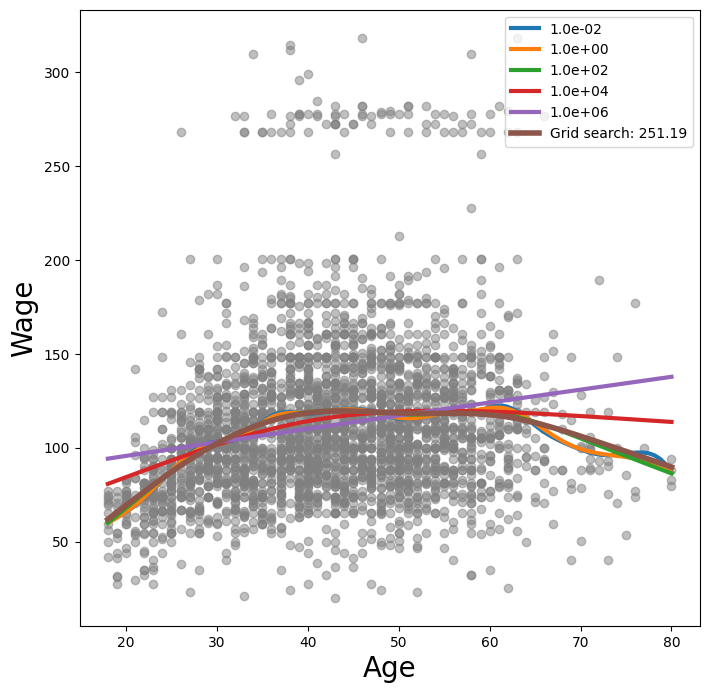

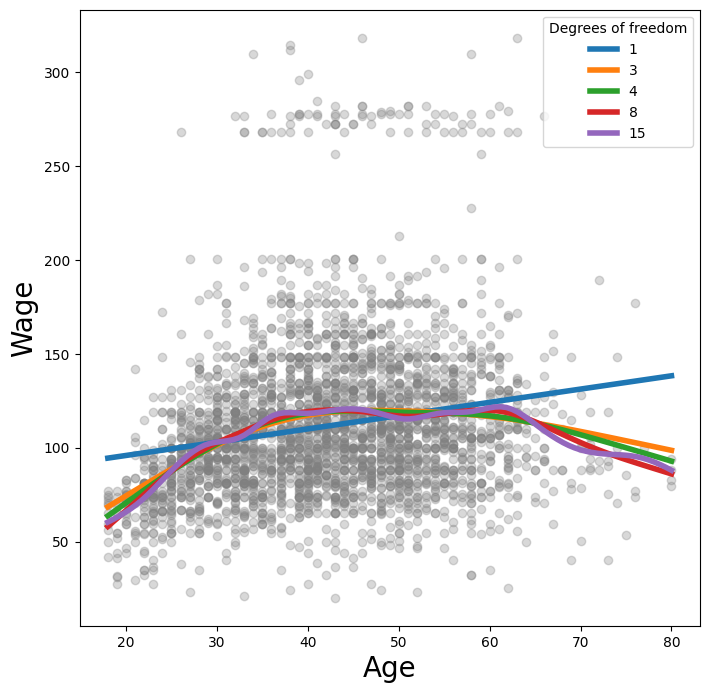

In [ ]:
# Carregamento dos dados
Wage = load_data('Wage')
y = Wage['wage']
age = Wage['age']

# Modelo LinearGAM com um termo de suaviza√ß√£o linear para 'age'
# e um par√¢metro de suaviza√ß√£o inicial (lambda) de 0.6
X_age = np.asarray(age).reshape((-1,1))
gam = LinearGAM(s_gam(0, lam=0.6))
gam.fit(X_age, y)

fig, ax = subplots(figsize=(8,8))
ax.scatter(age, y, facecolor='gray', alpha=0.5)
# Fazer a predi√ß√£o com diferentes valores de lambda
for lam in np.logspace(-2, 6, 5):
  gam = LinearGAM(s_gam(0, lam=lam)).fit(X_age, y)
  ax.plot(age_grid ,
          gam.predict(age_grid),
          label='{:.1e}'.format(lam),
          linewidth=3)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20);
ax.legend(title='$\lambda$')

# Pesquisa em grade para encontrar o valor √≥timo de lambda
gam_opt = gam.gridsearch(X_age, y)
optimal_lambda = gam_opt.lam

ax.plot(age_grid ,
gam_opt.predict(age_grid),
label="Grid search: {:.2f}".format(optimal_lambda[0][0]),
linewidth=4)
ax.legend()
fig

# Define um termo de suaviza√ß√£o para a idade
# Calcula o valor de lambda que corresponde a 4 graus de liberdade efetivos
# Define o valor de lambda para o termo de suaviza√ß√£o da idade
# Calcula os graus de liberdade efetivos
age_term = gam.terms[0]
lam_4 = approx_lam(X_age, age_term , 4)
age_term.lam = lam_4
degrees_of_freedom(X_age, age_term)

cv_results = {}
fig, ax = subplots(figsize=(8,8))
ax.scatter(X_age,
y,
facecolor='gray',
alpha=0.3)
for df in [1,3,4,8,15]:
  lam = approx_lam(X_age, age_term , df+1)
  age_term.lam = lam
  gam.fit(X_age, y)
  ax.plot(age_grid ,
          gam.predict(age_grid),
          label='{:d}'.format(df),
          linewidth=4)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20);
ax.legend(title='Degrees of freedom')

# Regress√£o Local (Local Regression)

A regress√£o local √© mais um m√©todo para ajustar fun√ß√µes n√£o lineares. O m√©todo √© baseado em ajustar um ponto $x_0$ utilizando apenas os dados de treinamento da regi√£o do ponto alvo e diferente do spline aqui as regi√µes pode se cruzar.
O modelo necessita da defini√ß√£o dos seguintes par√¢metros:
1. Span (s): definir√° qual a propor√ß√£o de pontos usados para calcular a regress√£o local em x_0. $$s = \frac{k}{n}$$
2. Peso ($K_0$):  $$K_{i0} = K(x_i, x_0)$$

Com os dados e par√¢metros definidos basta ajustar uma regress√£o de m√≠nimos quadrados ponderados do $y_i$ no $x_i$ usando os pesos mencionados no item 2, como segue:
$$\sum_{i=1}^n K_{i0}(y_i = \beta_0 - \beta_1x_i)^2$$

No fim o ajuste para $x_0$ ser√© dado por $\hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0$

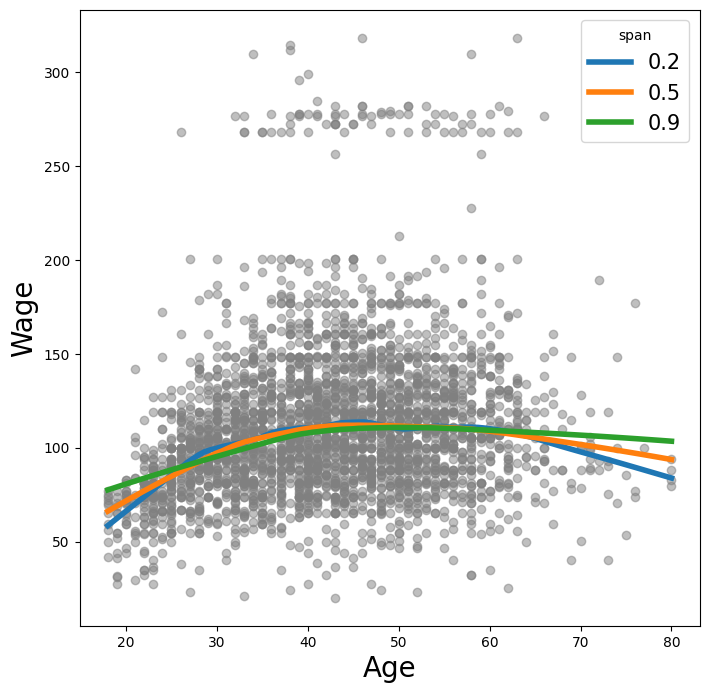

In [ ]:
import statsmodels.api as sm
from matplotlib.pyplot import subplots

lowess = sm.nonparametric.lowess
fig, ax = subplots(figsize=(8,8))
Wage = load_data('Wage')
y = Wage['wage']
age = Wage['age']
age_grid = np.linspace(age.min(),
age.max(),
100)

ax.scatter(age, y, facecolor='gray', alpha=0.5)
for span in [0.2, 0.5, 0.9]:
  fitted = lowess(y,
  age,
  frac=span,
  xvals=age_grid)
  ax.plot(age_grid,
  fitted,
  label='{:.1f}'.format(span),
  linewidth=4)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20);
ax.legend(title='span', fontsize=15);

#  Modelos Aditivos Generalizados (Generalized Additive Models (GAMs))

Nos modelos anteriores estavamos estudando uma maneira de prever uma resposta Y com base em um √∫nico preditor X. Agora iremos ver como prever Y com base em v√°rios preditores $X_1, X_2, ..., X_p$.

## GAMs para Problemas de Regress√£o (GAMs for Regression Problems)

Para transformar um modelo de regress√£o linear de forma a permitir uma rela√ß√£o n√£o linear entre as features e a resposta iremos trocar cada um dos componentes lineares ($\beta_jx_{ij}$) por uma fun√ß√£o n√£o linear ($f_j(x_{ij})$), com isso obteremos o seguinte modelo:
$$y_i = \beta_0 + \sum_{j=1}^p f_j(x_{ij}) + œµ_i = \beta_0 + f_1(x_{i1}) + f_2(x_{i2}) + ... + f_p(x_{ip}) + \epsilon_i$$

Esse √© um exemplo de um modelo aditivo, onde calculamos separadamente cada f_j para cada X_j e depois somamos todas as contribui√ß√µes. N√≥s podemos utilizar qualquer um dos metodos visto a cima para ajustar o nosso modelo aditivo. Por exemplo, para os dados de sal√°rios, podemos ter:
$$wage = \beta_0 + f_1(year) + f_2(age) + f_3(education) + œµ$$
Nesse exemplo year e age s√£o variaveis quantitativas e podem ser ajustados , por exemplo, segundo o modelo de splines natural, j√° a variavel education √© √© qualitativa e pode ser ajustada utilizando as vari√°veis dummy.


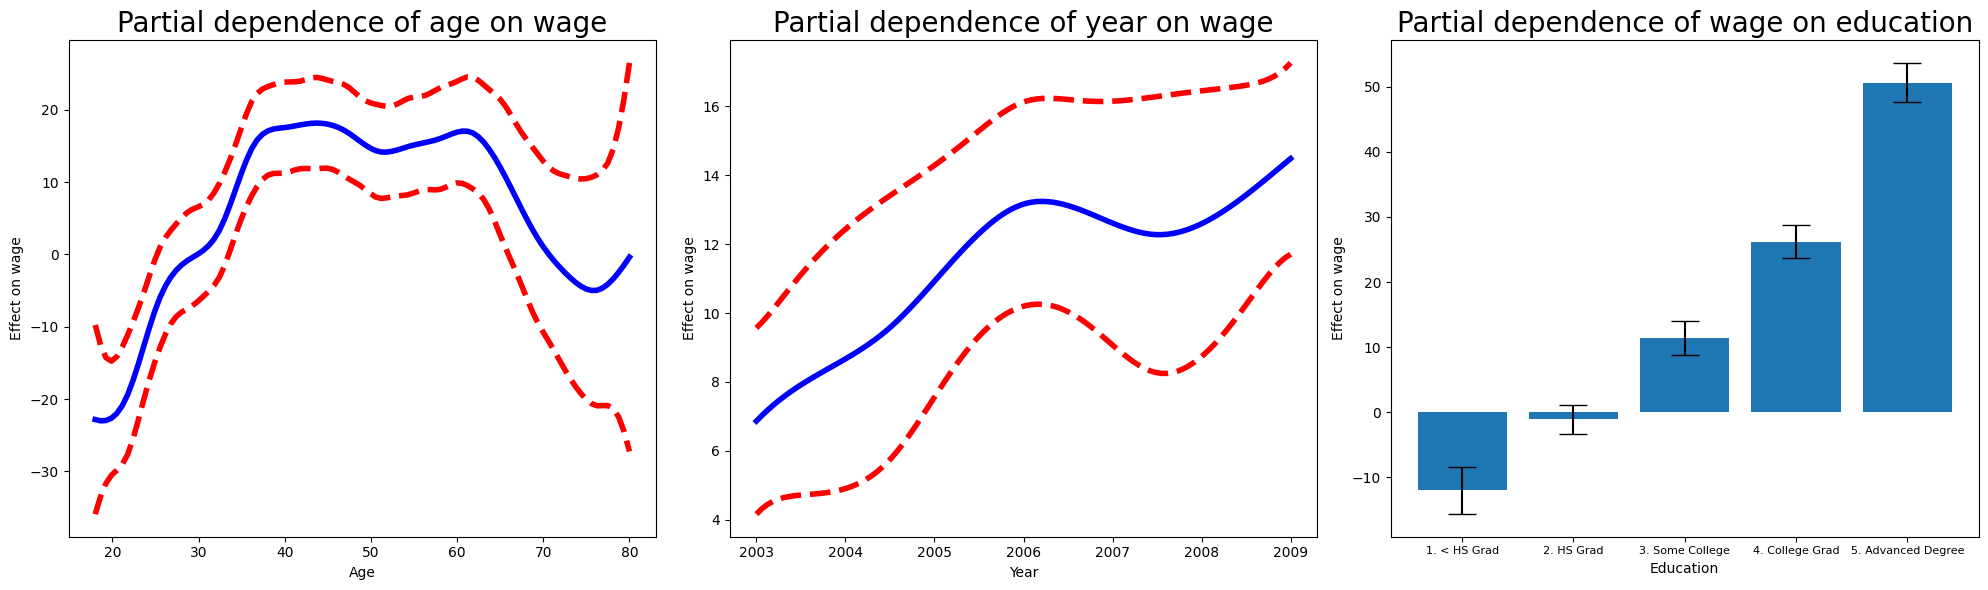

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Ajustando um spline natural com 4 graus de liberdade √† idade e 5 ao ano
ns_age = NaturalSpline(df=4).fit(age)
ns_year = NaturalSpline(df=5).fit(Wage['year'])
# Cria√ß√£o de uma matriz combinada
Xs = [ns_age.transform(age),
      ns_year.transform(Wage['year']),
      pd.get_dummies(Wage['education']).values]
X_bh = np.hstack(Xs)
# Ajuste de um modelo de regress√£o linear aos dados com as caracter√≠sticas criadas
gam_bh = sm.OLS(y, X_bh).fit()

# Criando uma matriz de caracter√≠sticas para a idade no grid
age_grid = np.linspace(age.min(),
                       age.max(),
                       100)
X_age_bh = X_bh.copy()[:100]
X_age_bh[:] = X_bh[:].mean(0)[None ,:]
X_age_bh[:,:4] = ns_age.transform(age_grid)
# Obtendo previs√µes e intervalos de confian√ßa usando o modelo ajustado
preds = gam_bh.get_prediction(X_age_bh)
bounds_age = preds.conf_int(alpha=0.05)
partial_age = preds.predicted_mean
center = partial_age.mean()
partial_age -= center
bounds_age -= center

# Criando um modelo de GAM linear completo
gam_full = LinearGAM(s_gam(0) +
s_gam(1, n_splines=7) +
f_gam(2, lam=0))
# Criando uma matriz de caracter√≠sticas para o modelo completo
Xgam = np.column_stack([age,
Wage['year'],
Wage['education'].cat.codes])
gam_full = gam_full.fit(Xgam, y)
# fig, ax = subplots(figsize=(8,8))
ax = axes[0]
plot_gam(gam_full , 0, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of age on wage',
fontsize=20)

age_term = gam_full.terms[0]
age_term.lam = approx_lam(Xgam, age_term , df=4+1)
year_term = gam_full.terms[1]
year_term.lam = approx_lam(Xgam, year_term , df=4+1)
gam_full = gam_full.fit(Xgam, y)
# fig, ax = subplots(figsize=(8,8))
ax = axes[1]
plot_gam(gam_full ,
1,
ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of year on wage', fontsize=20)

# fig, ax = subplots(figsize=(8, 8))
ax = axes[2]
ax = plot_gam(gam_full , 2)
ax.set_xlabel('Education')
ax.set_ylabel('Effect on wage')

ax.set_title('Partial dependence of wage on education',
fontsize=20);
ax.set_xticklabels(Wage['education'].cat.categories , fontsize=8)

# Ajuste o layout para evitar sobreposi√ß√£o de r√≥tulos
plt.tight_layout()

# Mostre a figura com os gr√°ficos lado a lado
plt.show()


## GAMs para Problemas de Classifica√ß√£o (GAMs for Classification Problems)

Uso de Gams quando Y √© qualitativo. Vamos assumir que Y assume valor 0 ou 1, estamos interessados em modelar a probabilidade condicional que representa a probabilidade de que Y seja igual a 1, ou seja, $p(X) = Pr(Y=1|X)$.

Temos que o modelo de regress√£o logistico GAM √©:
$$log \left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + f_1(X_1) + f_2(X_2) + ... + f_p(X_p)$$

A esquerda temos a probabilidade $p(X) = Pr(Y=1|X)$ versus $p(X) = Pr(Y=0|X)$.

Um exemplo de aplica√ß√£o desse modelo dados os nossos dados seria por exemplo prever a probabilidade da renda de um individual ser maior do que $250,000 por ano.

$$log \left(\frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 \times \text{year} + f_2(\text{age}) + f_3(\text{education})$$
onde,
$$p(X) = Pr(wage > 250 | year,age,educaion)$$


### Testes ANOVA para Modelos Aditivos (ANOVA Tests for Additive Models)

In [ ]:
# Cria um modelo LinearGAM (Generalized Additive Model) com termo de idade (age_term) e uma fun√ß√£o suave com 2 n√≥s (f_gam)
# Define lambda (par√¢metro de suaviza√ß√£o) como 0 para a fun√ß√£o suave
gam_0 = LinearGAM(age_term + f_gam(2, lam=0))
gam_0.fit(Xgam, y)

# Cria outro modelo LinearGAM adicionando termos de idade (age_term),
# uma fun√ß√£o suave linear (l_gam) com lambda 0 e uma fun√ß√£o suave com 2 n√≥s (f_gam) com lambda 0
gam_linear = LinearGAM(age_term +
l_gam(1, lam=0) +
f_gam(2, lam=0))
gam_linear.fit(Xgam, y)

# Calcula a an√°lise de vari√¢ncia (ANOVA) entre os dois modelos e o modelo completo (gam_full)
anova_gam(gam_0, gam_linear, gam_full)

deviance           df  deviance_diff   df_diff          F    pvalue
0  3.714362e+06  2991.004005            NaN       NaN        NaN       NaN
1  3.696746e+06  2990.005190   17616.542840  0.998815  14.265131  0.002314
2  3.693143e+06  2987.007254    3602.893655  2.997936   0.972007  0.435579

In [ ]:
# Gera o resumo do modelo completo gam_full
gam_full.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     12.9927
Link Function:                     IdentityLink Log Likelihood:                                 -24117.907
Number of Samples:                         3000 AIC:                                            48263.7995
                                                AICc:                                             48263.94
                                                GCV:                                             1246.1129
                                                Scale:                                           1236.4024
                                                Pseudo R-Squared:                                   0.2928
Feature Function                  Lam

<ipython-input-23-dd2b60753e24>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_full.summary()


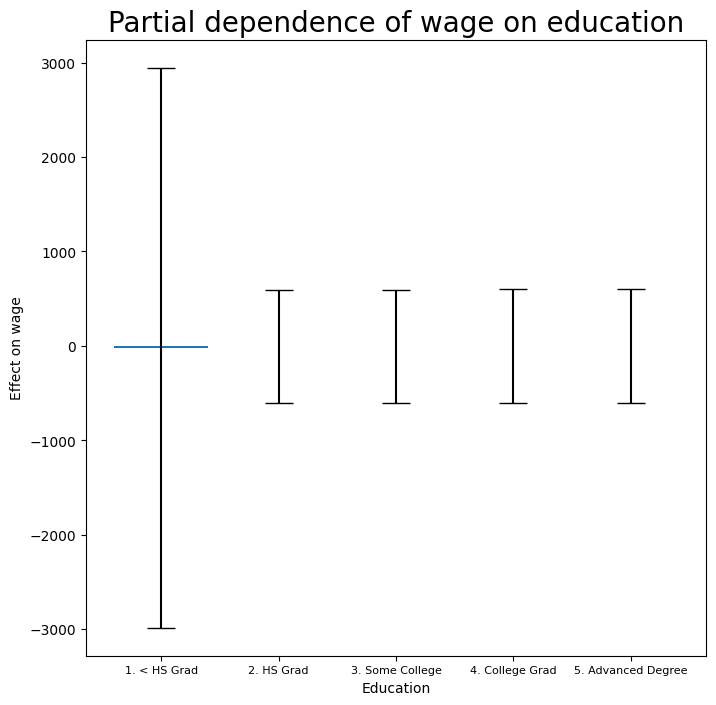

In [ ]:
Yhat = gam_full.predict(Xgam)
high_earn = Wage['high_earn'] = y > 250

# Cria um modelo LogisticGAM com termo de idade (age_term),
# uma fun√ß√£o suave linear (l_gam) com lambda 0 e uma fun√ß√£o suave com 2 n√≥s (f_gam) com lambda 0
gam_logit = LogisticGAM(age_term +
l_gam(1, lam=0) +
f_gam(2, lam=0))
gam_logit.fit(Xgam, high_earn)

fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit, 2)
ax.set_xlabel('Education')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of wage on education',
fontsize=20);
ax.set_xticklabels(Wage['education'].cat.categories, fontsize=8);

In [ ]:

# Calcula a tabela de conting√™ncia cruzada entre 'high_earn' e 'education'
pd.crosstab(Wage['high_earn'], Wage['education'])

education  1. < HS Grad  2. HS Grad  3. Some College  4. College Grad  \
high_earn                                                               
False               268         966              643              663   
True                  0           5                7               22   

education  5. Advanced Degree  
high_earn                      
False                     381  
True                       45

In [ ]:
only_hs = Wage['education'] == '1. < HS Grad'
Wage_ = Wage.loc[~only_hs]
Xgam_ = np.column_stack([Wage_['age'],
Wage_['year'],
Wage_['education'].cat.codes -1])
high_earn_ = Wage_['high_earn']

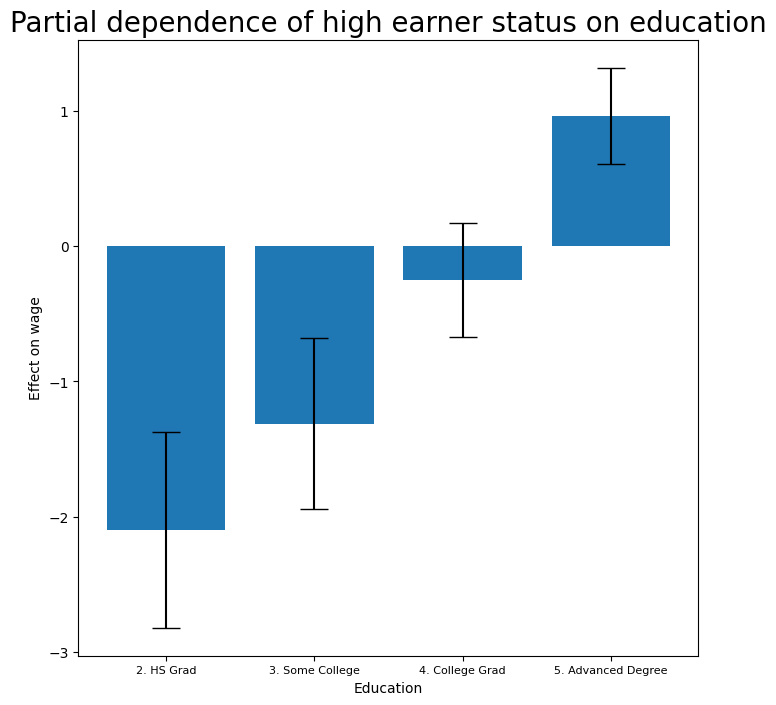

In [ ]:
gam_logit_ = LogisticGAM(age_term +
year_term +
f_gam(2, lam=0))
gam_logit_.fit(Xgam_, high_earn_)

fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit_, 2)
ax.set_xlabel('Education')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of high earner status on education' , fontsize=20);
ax.set_xticklabels(Wage['education'].cat.categories[1:],
fontsize=8);

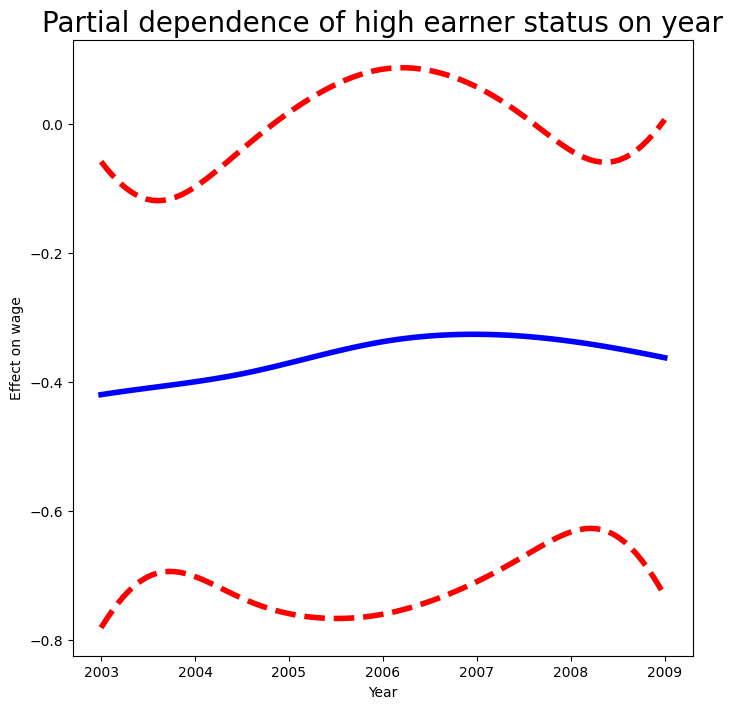

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit_, 1)
ax.set_xlabel('Year')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of high earner status on year',
fontsize=20);

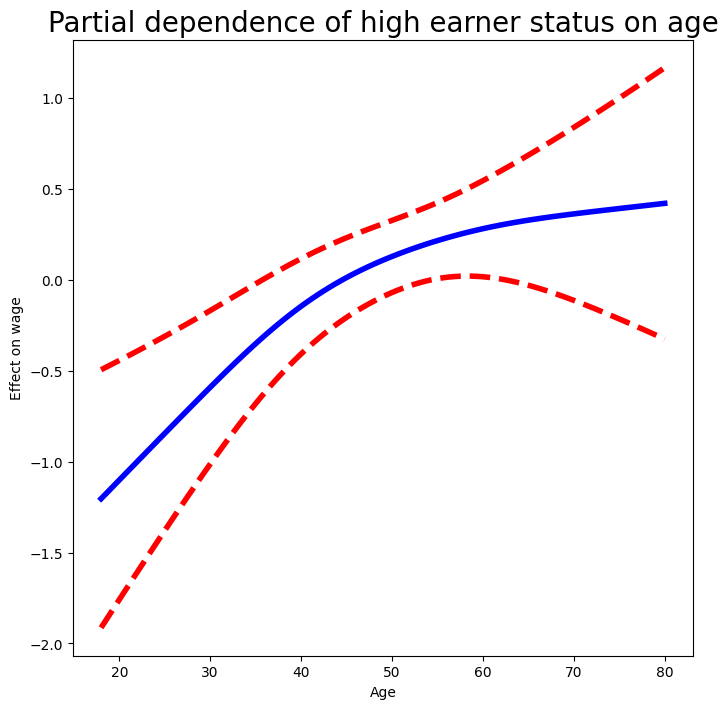

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit_, 0)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of high earner status on age',
fontsize=20);

# Bibliogr√°fia
**James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning, With Applications in Python. Springer.**
